In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import scipy as scp

from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import norm

Задача 1(9 из задания):

In [4]:
p_0 = 1./10
p = np.array([p_0]*10)
X = np.array([74, 92, 83, 79, 80, 73, 77, 75, 76, 91])
n = 800

#количество степеней свободы - 9

T_chi = 1./(n*p_0)*sum((X-n*p)**2)


#в этой задаче будем использовать некоторый \alpha = 0.05 - уровень значимости 
l,r = chi2.interval(0.05, 9)
if T_chi < r: print("Принимаем гипотезу о равномерном распределении")

Принимаем гипотезу о равномерном распределении


Задача 2:

In [57]:
#В этой задаче я изначально не заметил предложения что нужно разделить на 7, а потом сливать в одну какую-то из пар, 
#и, следуя указанию на лекции, искал максимальное значение количеста bins, при котором в каждой из них содержится
#минимум 5 значений. Однако, я понимаю, что могут быть очень плохие случаи, когда такой метод будет размельчать наши
#колонки очень долго. В этом случае необходимо использовать предложенный способ с объединением.

data = np.array([0.9315, 0.2695, 0.3878, 0.9745, 0.9924, 0.7457, 0.8475, 0.6628, 0.8187, 0.8893,
              0.8349, 0.7307, 0.0561, 0.2743, 0.0894, 0.8752, 0.6811, 0.2633, 0.2017, 0.9175,
              0.9216, 0.6255, 0.4706, 0.6466, 0.1435, 0.3346, 0.8364, 0.3615, 0.1722, 0.2976,
              0.7496, 0.2839, 0.4761, 0.9145, 0.2593, 0.6382, 0.2503, 0.3774, 0.2375, 0.8477,
              0.8377, 0.5630, 0.2949, 0.6426, 0.9733, 0.4877, 0.4357, 0.6582, 0.6353, 0.2173])

#plt.hist(X,N_i); где N_i = {10,...,6}, поиск оптимального n_bins; нашли, берем n_bins = 6

n_bins = 6

bins, bin_edges = np.histogram(data, bins=n_bins)

p_0 = 1./n_bins
p = np.array([p_0]*n_bins)
X = bins
n = 50

#----------------------------------------------
# количество степеней свободы - 5
#T_chi = 1./(n*p_0)*sum((X-n*p)**2)
#if T_chi < 9.23: print("Принимаем гипотезу о равномерном распределении") /если смотреть по таблице
#----------------------------------------------

#но в этой задаче воспользуемся p-value:

value, p_value = chisquare(X, f_exp=p*n, ddof=0, axis=0)
print(p_value)

if p_value > 0.05: print "Принимаем гипотезу о равномерном распределении"
#Видим, что p-value = 0.23, что отвечает нашим требованиям

0.229718937393
Принимаем гипотезу о равномерном распределении


Задача 3(10 из задания):

In [7]:
data = np.array([10,181,9])

p_t = 201./400 #найдено с помощью метода максимального правдоподобия L(p_t) = (2*p_t(1-p_t))**181 * ((1-p_t)**2)**9
p = np.array([p_t**2,2*p_t*(1-p_t),(1-p_t)**2])
X = data
n = 200
# количество степеней свободы - 1
T_chi = 1./(n)*sum((X-n*p)**2/p)

value, p_value = chisquare(X, f_exp=p*n, ddof=0, axis=0) #это хи квадрат для $X, p, n
print value, p_value

#Видим, что p_value - есть почти нулевая величина, что означает, что мы получили очень редкое событие и в
#соответствии с этим мы отвергаем нашу гипотезу о биномиальном распределении
if p_value > 0.05: print "Принимаем гипотезу"
else: print "Не принимаем"

131.234661776 3.1824037542e-29
Не принимаем


Задача 4

In [52]:
#----

Задача 5(12 из задания)

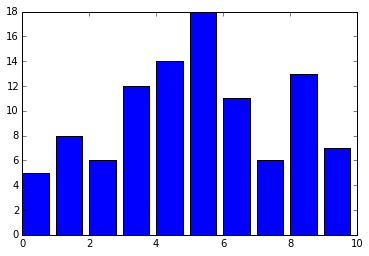

In [31]:
#X = np.linspace(-30,30,num=1000)
#plt.plot(X,norm.pdf(X))
X = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]
ind = [i+1./2 for i in range(10)]
m = np.mean([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
l = len([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
#plt.hist(np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7]-np.array([m]*l)))

plt.bar(range(10),[5, 8, 6, 12, 14, 18, 11, 6, 13, 7])

mu = 1./sum(X)*sum(np.array(X)*np.array(ind))

sigma = 1./sum(X)*sum(np.array(X)*(ind - mu)**2)

Первым делом оценим параметры $\mu$ и $\sigma^2$, сделать это можно воспользовавшись результатами с семинара:

$\mu = \frac1n \sum\nu_i z_i = 5.77$

$\sigma^2 = \frac1n \sum \nu_i (z_i - \mu)^2 = 6.28$

Теперь остаётся только оценить вероятности попадания в каждый из кусочков $[i,i+1]$ в случае нормального распределения с заданными параметрами:

$p_i = \frac{1}{\sqrt{2\pi} \sigma} \int\limits_i^{i+1} \exp(-\frac{(x - \mu)^2}{2\sigma^2})dx$


И находим $T_{\chi^2} = 52.2$

При этом степеней свободы - $N-1-2 = 7$

In [36]:
p_value = chi2.pdf(52.2,7)

print(p_value)

2.42052229161e-09


Таким образом, т.к. $p_{value}$ слишком мало, отвегаем гипотезу о нормальном распределении